# 신용카드 고객 데이터 세트

In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [25]:
df = pd.read_excel(r'D:\git_space\data\credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head()

(30000, 24)


LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 24 columns]

In [26]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

No handles with labels found to put in legend.


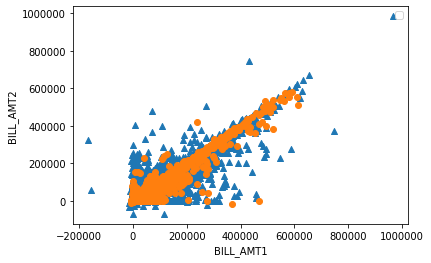

In [29]:
markers = ['^', 'o']

for i, marker in enumerate(markers):
    x_data = df[df['default'] == i]['BILL_AMT1']
    y_data = df[df['default'] == i]['BILL_AMT2']
    plt.scatter(x_data, y_data, marker=marker)

plt.legend()
plt.xlabel('BILL_AMT1')
plt.ylabel('BILL_AMT2')
plt.show()

#### Feature selection: 가장 많은 정보를 가진 데이터 선정(heatmap으로 feature 간의 상관관계 분석 후 선택)

(0, 23)

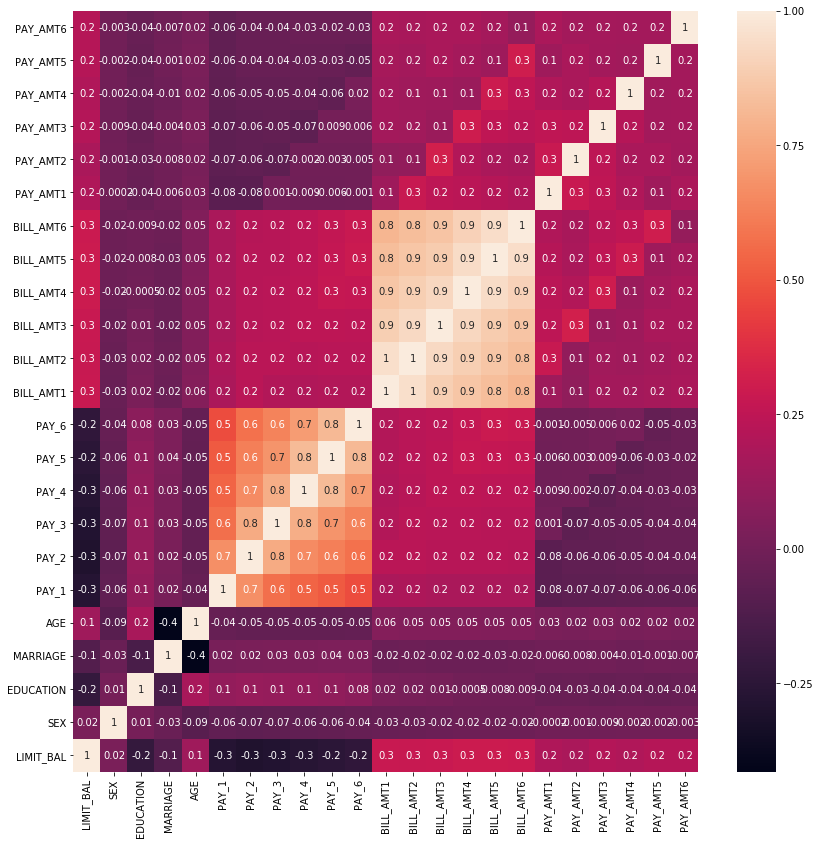

In [30]:
corr = X_features.corr()
plt.figure(figsize=(14, 14))
heatmap = sns.heatmap(corr, annot=True, fmt='.1g')
heatmap.get_ylim()
heatmap.set_ylim(0, 23)

In [31]:
cols_bill = ['BILL_AMT' + str(i) for i in range(1, 7)]
print(cols_bill)

df_scaled = StandardScaler().fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_scaled)
print(pca.explained_variance_ratio_)

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
[0.90555253 0.0509867 ]


In [33]:
df_pca = pca.transform(df_scaled)
print(df_pca.shape)

(30000, 2)


In [34]:
df_pca = pd.DataFrame(df_pca, columns=['component1', 'component2'])
df_pca['default'] = y_target
df_pca.head()

component1  component2  default
0   -1.611148    0.012479        1
1   -1.547595   -0.062344        1
2   -1.035874    0.011256        0
3   -0.250712    0.174374        0
4   -0.968951   -0.213032        0

No handles with labels found to put in legend.


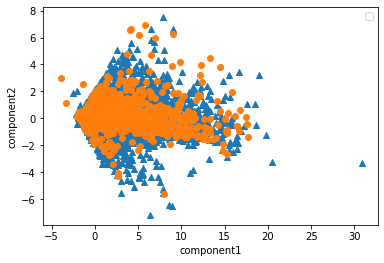

In [37]:
markers = ['^', 'o']

for i, marker in enumerate(markers):
    x_data = df_pca[df_pca['default'] == i]['component1']
    y_data = df_pca[df_pca['default'] == i]['component2']
    plt.scatter(x_data, y_data, marker=marker)

plt.legend()
plt.xlabel('component1')
plt.ylabel('component2')
plt.show()

### PCA 하고 plot을 봤는데 마음에 들진 않는다

In [38]:
rf = RandomForestClassifier(n_estimators=300)
scores = cross_val_score(rf, X_features, y_target, scoring='accuracy', cv=3)
print(scores)
print(np.mean(scores))

[0.8083 0.8212 0.8239]
0.8178000000000001


In [39]:
df_scaled = StandardScaler().fit_transform(X_features)
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores = cross_val_score(rf, df_pca, y_target, scoring='accuracy', cv=3)
print(scores)
print(np.mean(scores))

[0.7911 0.7962 0.8019]
0.7963999999999999
